<a href="https://colab.research.google.com/github/atharva2-0x/Calci_ts/blob/main/sentimentAI_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Reviews.csv')

In [4]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
data.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [8]:
data.isnull().sum()

,0
Review,0
Liked,0


In [9]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


In [10]:
value_counts = data['Liked'].value_counts()
print(value_counts)

Liked
1    500
0    500
Name: count, dtype: int64


In [11]:
pip install matplotlib

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

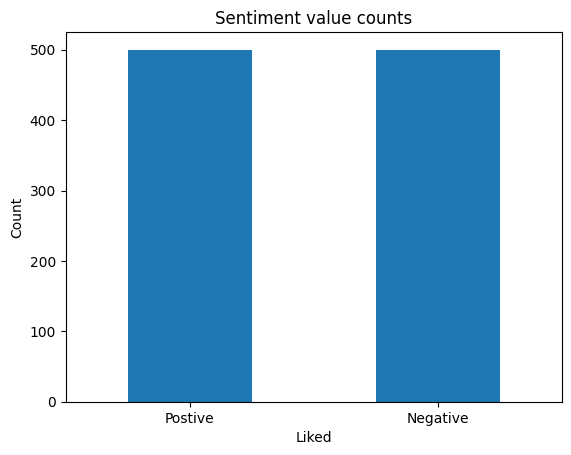

In [13]:
value_counts.plot(kind = 'bar' )
plt.title("Sentiment value counts")
plt.xlabel('Liked')
plt.ylabel('Count')
plt.xticks(ticks=[0,1] , labels=['Postive','Negative'],rotation=0)
plt.show()

In [16]:
from wordcloud import WordCloud

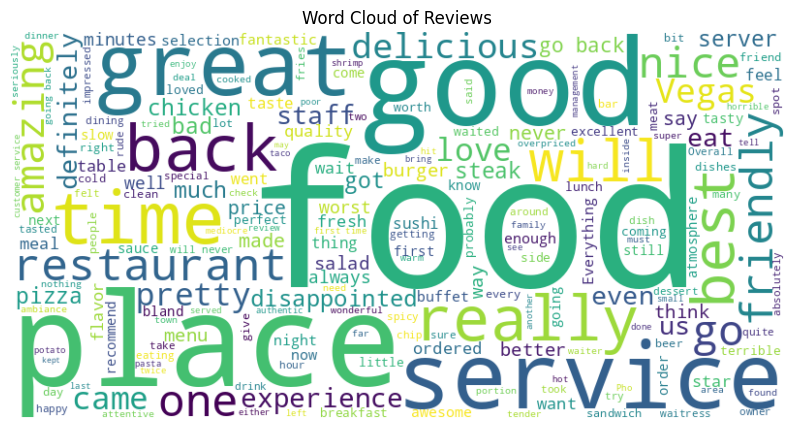

In [15]:
combined_text = " ".join(data['Review'])
wordcloud = WordCloud(width = 800 , height = 400 ,background_color = 'white').generate(combined_text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

In [17]:
from collections import Counter

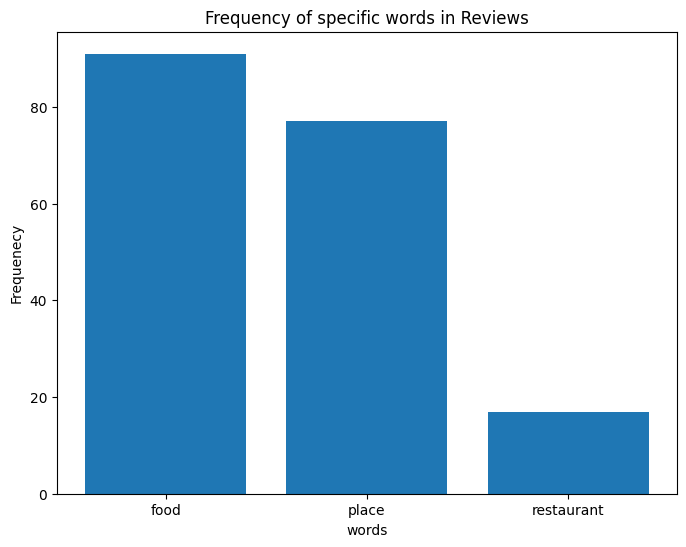

In [19]:
target_words = ['food','place','restaurant']
all_words = " ".join(data['Review']).lower().split()
word_counts = Counter(all_words)
target_word_counts = {word:word_counts[word] for word in target_words}
plt.figure(figsize=(8,6))
plt.bar(target_word_counts.keys(),target_word_counts.values())
plt.xlabel('words')
plt.ylabel('Frequenecy')
plt.title('Frequency of specific words in Reviews')
plt.show()

In [20]:
lowercased_text = data['Review'].str.lower()

In [21]:
from nltk.tokenize import word_tokenize

In [22]:
%pip install nltk
import nltk
nltk.download('punkt')

#tokinization
from nltk.tokenize import word_tokenize

data['Tokens'] = data['Review'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [23]:
data['Tokens'] = data['Review'].apply(word_tokenize)

In [24]:
data['Tokens']

,Tokens
0,"[Wow, ..., Loved, this, place, .]"
1,"[Crust, is, not, good, .]"
2,"[Not, tasty, and, the, texture, was, just, nas..."
3,"[Stopped, by, during, the, late, May, bank, ho..."
4,"[The, selection, on, the, menu, was, great, an..."
...,...
995,"[I, think, food, should, have, flavor, and, te..."
996,"[Appetite, instantly, gone, .]"
997,"[Overall, I, was, not, impressed, and, would, ..."
998,"[The, whole, experience, was, underwhelming, ,..."


In [27]:
data['Review'].value_counts()

,count
Review,
#NAME?,4
The food was terrible.,2
I would not recommend this place.,2
I love this place.,2
I won't be back.,2
...,...
"OMG, the food was delicioso!",1
There is nothing authentic about this place.,1
the spaghetti is nothing special whatsoever.,1


In [28]:
import string

In [29]:
data['Review'] = data['Review'].str.replace(f"[{string.punctuation}]"," ",regex = True)

In [30]:
print(data['Review'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


In [31]:
from nltk.corpus import stopwords

In [32]:
#Removing the stop words
from nltk.corpus import stopwords
import nltk

# Download the 'stopwords' corpus
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [33]:
stop_words = set(stopwords.words('english'))

In [34]:
data['Tokens'] = data['Review'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])

In [35]:
print(data['Tokens'])

0                                    [Wow, Loved, place]
1                                          [Crust, good]
2                           [Not, tasty, texture, nasty]
3      [Stopped, late, May, bank, holiday, Rick, Stev...
4                  [The, selection, menu, great, prices]
                             ...                        
995           [I, think, food, flavor, texture, lacking]
996                          [Appetite, instantly, gone]
997             [Overall, I, impressed, would, go, back]
998    [The, whole, experience, underwhelming, I, thi...
999    [Then, I, wasted, enough, life, poured, salt, ...
Name: Tokens, Length: 1000, dtype: object


In [36]:
#Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [37]:
stemmer = PorterStemmer()

In [58]:
data['stemmed'] = data['Review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))

In [39]:
print(data['stemmed'])

0                                     wow love thi place
1                                      crust is not good
2                 not tasti and the textur wa just nasti
3      stop by dure the late may bank holiday off ric...
4      the select on the menu wa great and so were th...
                             ...                        
995    i think food should have flavor and textur and...
996                               appetit instantli gone
997        overal i wa not impress and would not go back
998    the whole experi wa underwhelm and i think we ...
999    then as if i hadn t wast enough of my life the...
Name: stemmed, Length: 1000, dtype: object


In [40]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [41]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

In [42]:
lemmatizer = WordNetLemmatizer()

In [59]:
data['Lemmatized'] = data['stemmed'].apply(lambda x :' '.join([lemmatizer.lemmatize(word , pos = wordnet.VERB) for word in word_tokenize(x)]))


In [44]:
print(data['Lemmatized'])


0                                   Wow Loved this place
1                                      Crust be not good
2                Not tasty and the texture be just nasty
3      Stopped by during the late May bank holiday of...
4      The selection on the menu be great and so be t...
                             ...                        
995    I think food should have flavor and texture an...
996                                Appetite instantly go
997       Overall I be not impress and would not go back
998    The whole experience be underwhelming and I th...
999    Then as if I hadn t waste enough of my life th...
Name: Lemmatized, Length: 1000, dtype: object


In [60]:
#Removing the numbers from reviews
import re
data['No_Numbers'] = data['Lemmatized'].apply(lambda x : re.sub(r'\d+',' ' ,x))

In [46]:
print(data['No_Numbers'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: No_Numbers, Length: 1000, dtype: object


In [61]:
#removing special characters like @ # %,*
data['cleaned'] = data['No_Numbers'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]','' ,x))

In [49]:
print(data['cleaned'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: cleaned, Length: 1000, dtype: object


In [50]:
%pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 7.8 MB/s eta 0:00:00


In [55]:
import contractions
data['Expanded'] = data['cleaned'].apply(contractions.fix)

In [52]:
%pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 11.5 MB/s eta 0:00:00


In [62]:
import emoji
data['emoji'] = data['Expanded'].apply(emoji.demojize)

In [63]:
data

,Review,Liked,Tokens,stemmed,Lemmatized,No_Numbers,cleaned,Expanded,emoji
0,Wow Loved this place,1,"[Wow, Loved, place]",wow love thi place,wow love thi place,wow love thi place,wow love thi place,Wow Loved this place,Wow Loved this place
1,Crust is not good,0,"[Crust, good]",crust is not good,crust be not good,crust be not good,crust be not good,Crust is not good,Crust is not good
2,Not tasty and the texture was just nasty,0,"[Not, tasty, texture, nasty]",not tasti and the textur wa just nasti,not tasti and the textur wa just nasti,not tasti and the textur wa just nasti,not tasti and the textur wa just nasti,Not tasty and the texture was just nasty,Not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,"[Stopped, late, May, bank, holiday, Rick, Stev...",stop by dure the late may bank holiday off ric...,stop by dure the late may bank holiday off ric...,stop by dure the late may bank holiday off ric...,stop by dure the late may bank holiday off ric...,Stopped by during the late May bank holiday of...,Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...,1,"[The, selection, menu, great, prices]",the select on the menu wa great and so were th...,the select on the menu wa great and so be the ...,the select on the menu wa great and so be the ...,the select on the menu wa great and so be the ...,The selection on the menu was great and so wer...,The selection on the menu was great and so wer...
...,...,...,...,...,...,...,...,...,...
995,I think food should have flavor and texture an...,0,"[I, think, food, flavor, texture, lacking]",i think food should have flavor and textur and...,i think food should have flavor and textur and...,i think food should have flavor and textur and...,i think food should have flavor and textur and...,I think food should have flavor and texture an...,I think food should have flavor and texture an...
996,Appetite instantly gone,0,"[Appetite, instantly, gone]",appetit instantli gone,appetit instantli go,appetit instantli go,appetit instantli go,Appetite instantly gone,Appetite instantly gone
997,Overall I was not impressed and would not go b...,0,"[Overall, I, impressed, would, go, back]",overal i wa not impress and would not go back,overal i wa not impress and would not go back,overal i wa not impress and would not go back,overal i wa not impress and would not go back,Overall I was not impressed and would not go b...,Overall I was not impressed and would not go b...
998,The whole experience was underwhelming and I ...,0,"[The, whole, experience, underwhelming, I, thi...",the whole experi wa underwhelm and i think we ...,the whole experi wa underwhelm and i think we ...,the whole experi wa underwhelm and i think we ...,the whole experi wa underwhelm and i think we ...,The whole experience was underwhelming and I ...,The whole experience was underwhelming and I ...


In [64]:
# naive Bays Algo needs numerical data but our input is in text form so we have to convert into numerical
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [66]:
X = tfidf.fit_transform(data['emoji']).toarray()

In [67]:
X.shape

(1000, 2027)

In [73]:
y = data['Liked'].values
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [77]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [78]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [79]:
# for GaussianNB comparing the precision_score
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.7
[[66 42]
 [18 74]]
0.6379310344827587


In [80]:
# for MultinomialNB comparing the precision_score
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.8
[[80 28]
 [12 80]]
0.7407407407407407


In [81]:
# for BernoulliNB comparing the precision_score
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.795
[[76 32]
 [ 9 83]]
0.7217391304347827


In [82]:
from sklearn import svm


In [91]:
svmc = svm.SVC()
svmc.fit(X_train, y_train)
y_pred4 = svmc.predict(X_test)
print(accuracy_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(precision_score(y_test,y_pred4))


0.85
[[92 16]
 [14 78]]
0.8297872340425532


In [86]:
from sklearn.ensemble import RandomForestClassifier


In [87]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred5 = rf_classifier.predict(X_test)
print(accuracy_score(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))
print(precision_score(y_test,y_pred5))

0.825
[[92 16]
 [19 73]]
0.8202247191011236


In [92]:
import pickle
pickle.dump(tfidf,open('vetcorizer.pkl','wb'))
pickle.dump(svmc,open('model.pkl','wb'))

In [94]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(stemmer.stem(i))

    return " ".join(y)

In [110]:
tfidf = pickle.load(open('vetcorizer.pkl', 'rb'))
model = pickle.load(open('model.pkl','rb'))

input_sms ="I loved the ambiance, as well as food is good!"

transformed_sms = transform_text(input_sms)
vector_input = tfidf.transform([transformed_sms])
dense_vector_input = vector_input.toarray()
result = model.predict(dense_vector_input)

if result == 1:
  print("User Liked ")
else:
  print("User Disliked")

User Liked 
